<a href="https://colab.research.google.com/github/Juansecod/smartbit/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final**
El proyecto consiste en encontra el modelo mas optimo, ofrecidos por la libreria sci-kit learn, que permita la categorizacion de componentes de computadoras personales(PC) mediante su marca, precio y puntuación.

-------


## **Importacion de dependencias**
Antes de empezar a desarrollar el programa, primero se debe de importar las librerias que se van a usar que son las siguientes:
  - ***Pandas***
  - ***Seaborn***
  - ***Matplot***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## **Carga del Dataset**
Para poder entrenar nuestro modelo primero debemos de cargar en un dataframe nuestro dataset de datos. Este dataset se encuentra en el siguiente link: [PC Component Prices Comparison](https://www.kaggle.com/datasets/thedevastator/pc-component-prices-comparison).

In [ ]:
df = pd.read_csv("./drive/MyDrive/SmartBit/ComponentesPC_Scraper_DataSet.csv")

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7673 entries, 0 to 7672
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       7673 non-null   int64  
 1   company_name    7673 non-null   object 
 2   name            7673 non-null   object 
 3   brand_name      7673 non-null   object 
 4   category        7673 non-null   object 
 5   product_number  7673 non-null   object 
 6   price           7673 non-null   float64
 7   score           7673 non-null   float64
 8   image_url       7673 non-null   object 
 9   reviews         7673 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 599.6+ KB


,timestamp,price,score,reviews
count,7.673000e+03,7673.000000,7673.000000,7673.000000
mean,1.604480e+09,162.676538,6.096097,69.428646
std,1.648733e+07,242.580039,4.395846,253.434731
min,1.604706e+08,0.990000,0.000000,0.000000
25%,1.604574e+09,56.198347,0.000000,0.000000
50%,1.604750e+09,96.024793,8.990000,5.000000
75%,1.604755e+09,175.000000,9.500000,38.000000
max,1.604765e+09,4500.223140,10.000000,7678.000000


## **Analisis de datos**
A continuacion, lo que se realiza es un grafico de pares el cual nos permitira visualizar como se relacionan y comportan nuestras variables.


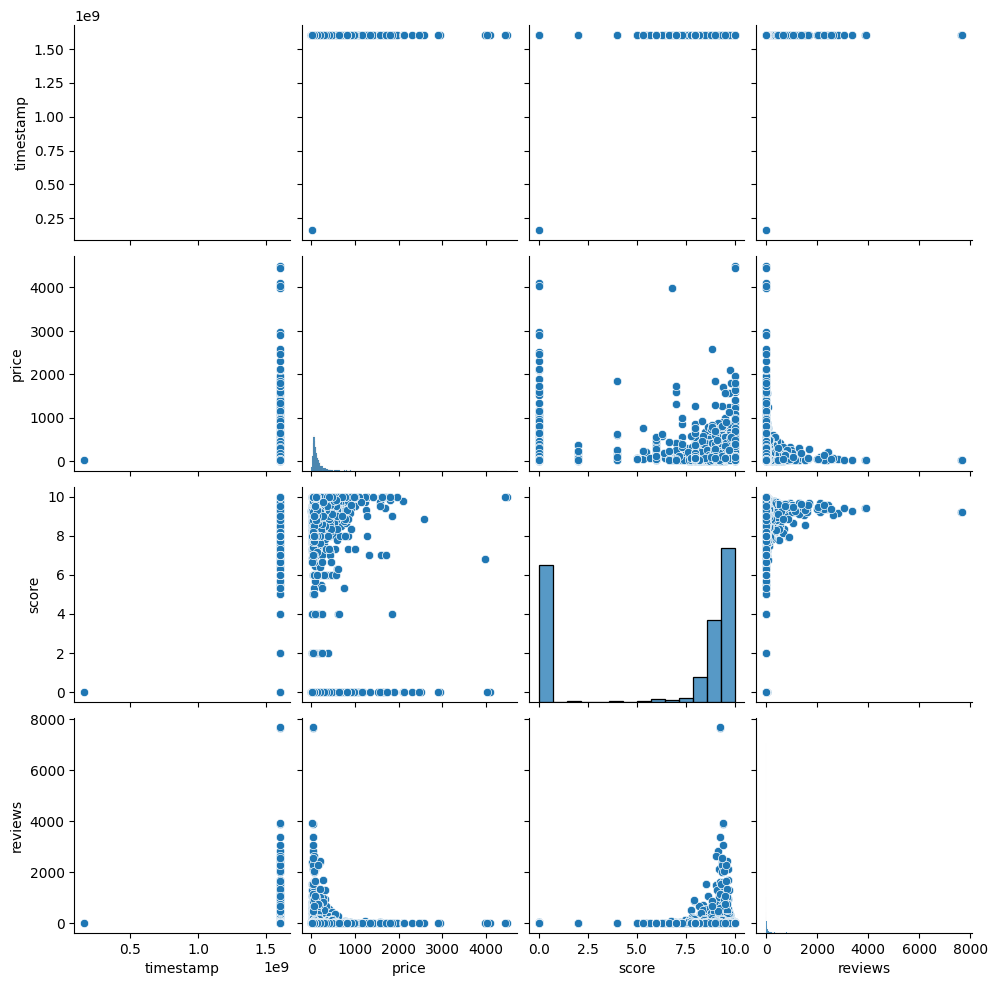

In [ ]:
sns.pairplot(df)
plt.show()

## **Limpieza de datos**

Limpio los datos para que unicamente tenga en cuenta los datos que cuentan con mas de 50 reviews y una calificación mayor de 0 para tener unos datos limpios. Luego, para un mejor conjunto de datos para el procesamiento del modelo, se le asignan codigos numericos a las variables categoricas de interes que son la marca y la categoria del producto

In [ ]:
df_filtered = df.loc[(df["reviews"] >= 50) & (df["score"] > 0)]


le_brand = LabelEncoder()
le_category = LabelEncoder()
df_filtered["brand_code"] = le_brand.fit_transform(df_filtered["brand_name"])
df_filtered["category_code"] = le_category.fit_transform(df_filtered["category"])

df_filtered.info()
df_filtered.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1655 entries, 3 to 6935
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       1655 non-null   int64  
 1   company_name    1655 non-null   object 
 2   name            1655 non-null   object 
 3   brand_name      1655 non-null   object 
 4   category        1655 non-null   object 
 5   product_number  1655 non-null   object 
 6   price           1655 non-null   float64
 7   score           1655 non-null   float64
 8   image_url       1655 non-null   object 
 9   reviews         1655 non-null   int64  
 10  brand_code      1655 non-null   int64  
 11  category_code   1655 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 168.1+ KB


<ipython-input-32-448a4a44ada5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["brand_code"] = le_brand.fit_transform(df_filtered["brand_name"])
<ipython-input-32-448a4a44ada5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["category_code"] = le_category.fit_transform(df_filtered["category"])


,timestamp,price,score,reviews,brand_code,category_code
count,1.655000e+03,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000
mean,1.604661e+09,108.886674,9.217281,293.981873,20.312991,3.141390
std,9.229689e+04,103.494678,0.400066,482.781246,13.715936,2.477336
min,1.604562e+09,5.250000,6.770000,50.000000,0.000000,0.000000
25%,1.604568e+09,43.785124,9.060000,78.000000,9.000000,1.000000
50%,1.604750e+09,75.990000,9.310000,145.000000,17.000000,2.000000
75%,1.604752e+09,137.900000,9.490000,316.000000,31.000000,6.000000
max,1.604759e+09,1241.909091,9.920000,7678.000000,50.000000,7.000000


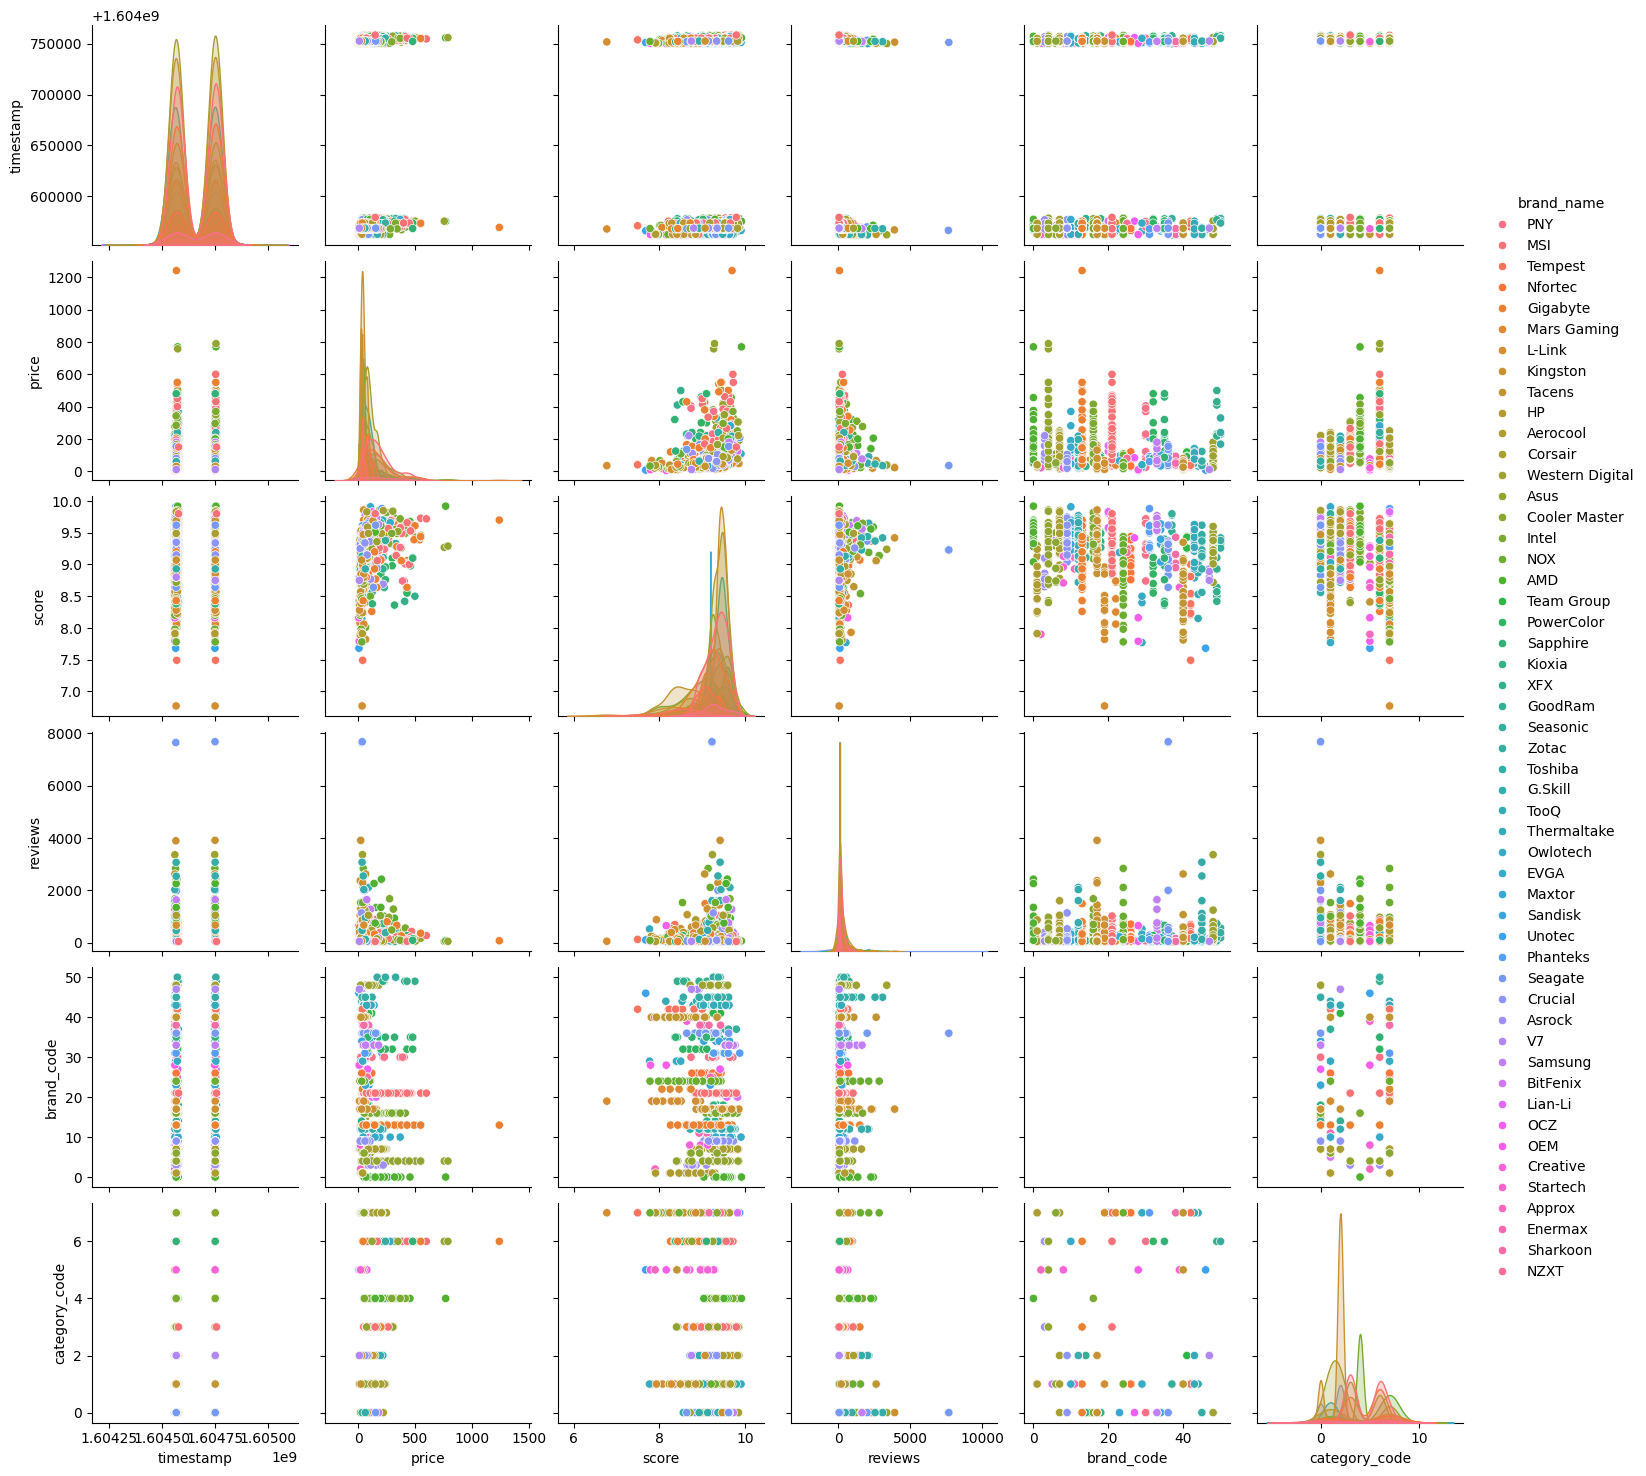

In [ ]:
sns.pairplot(df_filtered, hue="brand_name")
plt.show()

Defino constantes para posteriormente en las predicciones sea mas accesible para el usuario al mostrarle unicamente las variables categoricas y no sus codigos.

In [ ]:
BRAND_NAMES = le_brand.classes_
CATEGORY_NAMES = le_category.classes_

## **Entrenamiento del Modelo**

Primero, divido los datos que usare como variables de entrada y la variabe de salida. Luego, entreno diferentes modelos de aprendizaje supervisado para tomar el mejor resultado de precisión.

In [ ]:
X = df_filtered[[
    'brand_code',
    'price',
    'score'
]]
y = df_filtered['category_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

accuracy = {}

logisticModel = LogisticRegression()
logisticModel.fit(X_train, y_train)

y_pred = logisticModel.predict(X_test)

accuracy['logistic_regression'] = accuracy_score(y_test, y_pred)
print("Accuracy:", f"{accuracy['logistic_regression']:.2f}")

Accuracy: 0.53


### **Ramdom Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier()
randomForestModel.fit(X_train, y_train)

y_pred = randomForestModel.predict(X_test)

accuracy['random_forest'] = accuracy_score(y_test, y_pred)
print("Accuracy:", f"{accuracy['random_forest']:.2f}")

Accuracy: 0.91


### **SVC**

In [ ]:
from sklearn.svm import SVC

svcModel = SVC()
svcModel.fit(X_train, y_train)

y_pred = svcModel.predict(X_test)

accuracy['svc'] = accuracy_score(y_test, y_pred)
print("Accuracy:", f"{accuracy['svc']:.2f}")

Accuracy: 0.57


### **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoostingModel = GradientBoostingClassifier()
gradientBoostingModel.fit(X_train, y_train)


y_pred = gradientBoostingModel.predict(X_test)

accuracy['gradient_boosting'] = accuracy_score(y_test, y_pred)
print("Accuracy:", f"{accuracy['gradient_boosting']:.2f}")

Accuracy: 0.86


## **Resultados**

Ahora, graficamos la precision que tuvieron los diferentes modelos y se crea un programa por consola para predecir la categoria de un producto en base a sus reseñas, precio y marca.

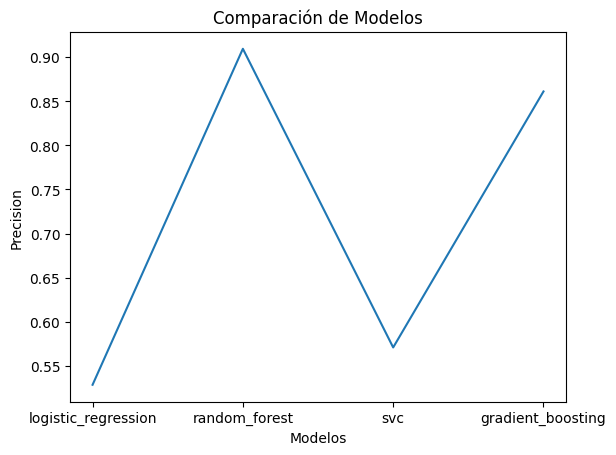

In [ ]:
plt.plot(accuracy.keys(), accuracy.values())
plt.xlabel('Modelos')
plt.ylabel('Precision')
plt.title('Comparación de Modelos')
plt.show()

## **Aplicacion de Consola**

Ahora, creo el codigo para que atraves de la consola el usuario ingrese los campos requeridos y le devuelve la categoria del producto consultado.



In [ ]:
from IPython.display import clear_output

def predict_category(brand, price, score):
    brand_code = BRAND_NAMES.tolist().index(brand)
    data = pd.DataFrame({
        'brand_code': [brand_code],
        'price': [price],
        'score': [score]
    })
    category_code = gradientBoostingModel.predict(scaler.transform(data))[0]

    return CATEGORY_NAMES[category_code]

continueValues = ["si", "s", "yes", "y"]

while True:
  try:
    clear_output()
    brand = input("Ingrese el nombre de la marca(Sensible a mayusculas): ")
    price = float(input("Ingrese el precio del producto(USD): "))
    score = float(input("Ingrese la puntuación del producto: "))

    if brand not in BRAND_NAMES:
      raise ValueError("Marca no válida")

    if price < 0:
      raise ValueError("Precio no válido")

    if score < 0 or score > 10:
      raise ValueError("Puntuación no válida")

    print(predict_category(brand, price, score))
  except ValueError as value:
    print(f"{str(value)}")
  except Exception as e:
    print(f"{str(e)}")
  finally:
    _ = input("Desea consultar otra categoria? ").lower()
    if _ not in continueValues:
      break

Ingrese el nombre de la marca(Sensible a mayusculas): MSI
Ingrese el precio del producto(USD): 1500
Ingrese la puntuación del producto: 7.5
Tarjetas graficas
Desea consultar otra categoria? no
